In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
""" Manually downloaded the Sign Language MNIST dataset to ~/tensorflow_datasets/sign_language_mnist """
dataset_dir = os.path.join('/Users/carlos/tensorflow_datasets/sign_language_mnist')
training_dir = dataset_dir + '/sign_mnist_train.csv'
validation_dir = dataset_dir + '/sign_mnist_test.csv'

arr = np.loadtxt(open(training_dir, "rb"), delimiter=",", skiprows=1)

In [3]:
""" Explore the data so we know how to preprocess it to work with the ImageDataGenerator """
print('total images: ', len(arr))
print('input shape:  ', arr.shape)
print(arr, '\n')

first_label = arr[0][0]
first_image = arr[0][1:]
first_image_28 = np.array_split(first_image, 28)

print('first label: ', first_label)
print('first image: ', first_image)

print()
print(len(first_image_28))    # type is float
print(len(first_image_28[0])) # type is List[float]

total images:  27455
input shape:   (27455, 785)
[[  3. 107. 118. ... 204. 203. 202.]
 [  6. 155. 157. ... 103. 135. 149.]
 [  2. 187. 188. ... 195. 194. 195.]
 ...
 [ 18. 174. 174. ... 202. 200. 200.]
 [ 17. 177. 181. ...  64.  87.  93.]
 [ 23. 179. 180. ... 205. 209. 215.]] 

first label:  3.0
first image:  [107. 118. 127. 134. 139. 143. 146. 150. 153. 156. 158. 160. 163. 165.
 159. 166. 168. 170. 170. 171. 171. 171. 172. 171. 171. 170. 170. 169.
 111. 121. 129. 135. 141. 144. 148. 151. 154. 157. 160. 163. 164. 170.
 119. 152. 171. 171. 170. 171. 172. 172. 172. 172. 172. 171. 171. 170.
 113. 123. 131. 137. 142. 145. 150. 152. 155. 158. 161. 163. 164. 172.
 105. 142. 170. 171. 171. 171. 172. 172. 173. 173. 172. 171. 171. 171.
 116. 125. 133. 139. 143. 146. 151. 153. 156. 159. 162. 163. 167. 167.
  95. 144. 171. 172. 172. 172. 172. 172. 173. 173. 173. 172. 172. 171.
 117. 126. 134. 140. 145. 149. 153. 156. 158. 161. 163. 164. 175. 156.
  87. 154. 172. 173. 173. 173. 173. 173. 174. 174.

In [4]:
def get_data(filename):
    # You will need to write code that will read the file passed
    # into this function. The first line contains the column headers
    # so you should ignore it
    # Each successive line contians 785 comma separated values between 0 and 255
    # The first value is the label
    # The rest are the pixel values for that picture
    # The function will return 2 np.array types. One with all the labels
    # One with all the images
    #
    # Tips: 
    # If you read a full line (as 'row') then row[0] has the label
    # and row[1:785] has the 784 pixel values
    # Take a look at np.array_split to turn the 784 pixels into 28x28
    # You are reading in strings, but need the values to be floats
    # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        # Your code starts here
        data = np.loadtxt(training_file, delimiter=",", skiprows=1)
        labels = list()
        images = list()

        for row in data:
            labels.append(row[0])
            image = np.array_split(row[1:], 28)  # split the 1D array into 28x28
            images.append(image)
        
        labels = np.array(labels).astype('float')
        images = np.array(images).astype('float')
        # Your code ends here
    return images, labels

training_images, training_labels = get_data(training_dir)
testing_images, testing_labels = get_data(validation_dir)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [5]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [16]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    
    
)

train_generator = train_datagen.flow(
    x=training_images,
    y=training_labels
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_generator = validation_datagen.flow(
    x=testing_images,
    y=testing_labels
)

In [19]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax') # 25 since we are not including J and Z (they require motion)
])

# Compile Model. 
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               410112    
_________________________________________________________________
dense_13 (Dense)             (None, 25)               

In [20]:
# Train the Model
history = model.fit(
    train_generator,
    epochs=2,
    validation_data=validation_generator
)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/2
858/858 [==============================] - 9s 11ms/step - loss: 2.6255 - accuracy: 0.1998 - val_loss: 1.7686 - val_accuracy: 0.3911
Epoch 2/2
858/858 [==============================] - 9s 10ms/step - loss: 1.9099 - accuracy: 0.3901 - val_loss: 1.2989 - val_accuracy: 0.5506


[150.92510986328125, 0.4829894006252289]

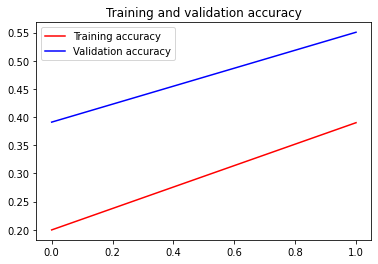

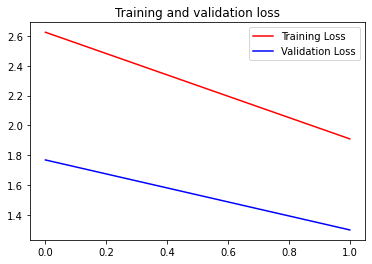

In [22]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Final Thoughts of this Exercise

I didn't like this challenge! Most of what I used wasn't taught in the course or covered at all... On top of that, I couldn't use things like Pandas to make the preprocessing a LOT easier, but maybe that was part of the challenge. I did learn a few things in my research to solve this problem, but I think I want to try this challenge again without the constraints to see how far I can go :)